## Results

No of records : 3549   
Ship Type : Gas Carrier   
Training Accuracy : 0.9241      
Testing Accuracy : 0.8885 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df_train = pd.read_excel('Data_2024/ShipType2.xlsx')
df_test = pd.read_excel('Data_2025/ShipType2.xlsx')

pd.set_option('display.max_columns', None)
df_train.columns = df_train.columns.str.replace(' ', '_')
df_train = df_train.fillna(0)
df_train = df_train.loc[:, ~df_train.columns.duplicated()]

df_test.columns = df_test.columns.str.replace(' ', '_')
df_test = df_test.fillna(0)
df_test = df_test.loc[:, ~df_test.columns.duplicated()]

In [3]:
df_train = df_train.select_dtypes(include=['float64', 'int64'])

corr = df_train.corr()['TOTALCO2EMISSION'].sort_values(ascending=False)
corr.head(30)

TOTALCO2EMISSION        1.000000
Distance                0.922980
ME_RunningHour          0.912831
FCPH                    0.729139
AVGSPEED                0.684949
ME_HFO                  0.543645
AE_Boiler_HFO           0.537475
AE_HFO                  0.520514
swell_height            0.487790
FCPD_YTD                0.479465
ROB_HFO                 0.433299
wind_bft                0.427683
AE_LFO                  0.421579
CII_REFERENCE           0.416848
REQUIRED_CII            0.416814
FCPH_YTD                0.400699
wave_height             0.388091
DeadWeight              0.259803
GrossTonnage            0.259681
ISEUMRV_ZEROEMISSION    0.259681
YearOfBuilt             0.259569
FCPD                    0.240179
AVGSPEED_YTD            0.217071
RID                     0.193457
RID.1                   0.193457
draft_aft               0.179620
draft_fwd               0.176918
ME_MDO                  0.158700
ROB_MDO                 0.154423
Incienrator_MDO         0.123518
Name: TOTA

In [4]:
df_train.rename(columns={'Distance': 'Distance',
                   'ME_RunningHour': 'SteamingTime',
                   'DeadWeight': 'Deadweight',
                   'GrossTonnage': 'GrossTonnage',
                   'ME_MDO/MGO': 'ME_MDO/MGO',
                   'ME_HFO': 'ME_HFO',
                   'ME_LFO': 'ME_LFO',
                   'AE_Boiler_MDO/MGO':'AE_Boiler_MDO/MGO',
                   'AE_Boiler_HFO':'AE_Boiler_HFO',
                   'AE_Boiler_LFO':'AE_Boiler_LFO'}, inplace=True)

X_train = df_train[['Deadweight', 'GrossTonnage',
        'Distance', 'SteamingTime',
        'ME_MDO/MGO', 'ME_HFO',
        'ME_LFO', 'AE_Boiler_MDO/MGO',
        'AE_Boiler_HFO', 'AE_Boiler_LFO']]


y_train = df_train['TOTALCO2EMISSION']

In [5]:
df_test.rename(columns={'Distance': 'Distance',
                   'ME_RunningHour': 'SteamingTime',
                   'DeadWeight': 'Deadweight',
                   'GrossTonnage': 'GrossTonnage',
                   'ME_MDO/MGO': 'ME_MDO/MGO',
                   'ME_HFO': 'ME_HFO',
                   'ME_LFO': 'ME_LFO',
                   'AE_Boiler_MDO/MGO':'AE_Boiler_MDO/MGO',
                   'AE_Boiler_HFO':'AE_Boiler_HFO',
                   'AE_Boiler_LFO':'AE_Boiler_LFO'}, inplace=True)

X_test = df_test[['Deadweight', 'GrossTonnage',
        'Distance', 'SteamingTime',
        'ME_MDO/MGO', 'ME_HFO',
        'ME_LFO', 'AE_Boiler_MDO/MGO',
        'AE_Boiler_HFO', 'AE_Boiler_LFO']]


y_test = df_test['TOTALCO2EMISSION']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)

Training set size: (2839, 10) (2839,)
Test set size: (710, 10) (710,)


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [7]:
models = [
    ('LR', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('L_SVR', LinearSVR()),
    ('DT', DecisionTreeRegressor()),
    ('ADA', AdaBoostRegressor()),
    ('RF', RandomForestRegressor()),
    ('GB', GradientBoostingRegressor()),
    ('XGB', XGBRegressor())
]

results = []

# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Compute R² scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Compute MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Compute RMSE
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    # Append results as a new row
    results.append([name, train_r2, test_r2, train_mse, train_rmse, test_mse, test_rmse])

# Create DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['Model', 'Train R² Score', 'Test R² Score', 'Train MSE', 'Train RMSE', 'Test MSE', 'Test RMSE'])

# Print the results
print(results_df)

C:\Users\Abhedaya\CO2Prediction\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.450e+05, tolerance: 4.885e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Abhedaya\CO2Prediction\env\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


   Model  Train R² Score  Test R² Score   Train MSE  Train RMSE    Test MSE  \
0     LR        0.905360       0.872217  158.009813   12.570195  105.297358   
1  Ridge        0.905358       0.872368  158.014019   12.570363  105.173091   
2  Lasso        0.893320       0.857995  178.112130   13.345866  117.016400   
3  L_SVR        0.864287       0.858679  226.586036   15.052775  116.452970   
4     DT        0.977308       0.764600   37.886104    6.155169  193.976938   
5    ADA        0.895268       0.764917  174.859367   13.223440  193.715755   
6     RF        0.969398       0.842231   51.092937    7.147932  130.007085   
7     GB        0.943374       0.863899   94.542045    9.723273  112.151376   
8    XGB        0.968543       0.819075   52.520834    7.247126  149.087958   

   Test RMSE  
0  10.261450  
1  10.255393  
2  10.817412  
3  10.791338  
4  13.927560  
5  13.918181  
6  11.402065  
7  10.590155  
8  12.210158  


In [16]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Objective function for Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
        'random_state': 42,
        'n_jobs': -1
    }
    
    model = XGBRegressor(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    return mean_squared_error(y_test, preds)

# Run the study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Best parameters
print("Best parameters:", study.best_params)

# Final evaluation
best_model = XGBRegressor(**study.best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("Test R² Score:", r2_score(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


[I 2025-04-16 14:45:08,105] A new study created in memory with name: no-name-06b75566-b089-4224-aeed-e9449a66dfc0
[I 2025-04-16 14:45:09,772] Trial 0 finished with value: 176.8150025959417 and parameters: {'n_estimators': 834, 'max_depth': 7, 'learning_rate': 0.22292632098157056, 'subsample': 0.6567756969387752, 'colsample_bytree': 0.840107019307763, 'gamma': 1.7042373565281914, 'reg_alpha': 6.810470664213063, 'reg_lambda': 0.46380499709712253}. Best is trial 0 with value: 176.8150025959417.
[I 2025-04-16 14:45:12,724] Trial 1 finished with value: 177.71582520742746 and parameters: {'n_estimators': 384, 'max_depth': 11, 'learning_rate': 0.17276081654404826, 'subsample': 0.781825696970416, 'colsample_bytree': 0.6246944174245733, 'gamma': 0.0061750466789717295, 'reg_alpha': 4.20294607662351, 'reg_lambda': 2.9567599110080556}. Best is trial 0 with value: 176.8150025959417.
[I 2025-04-16 14:45:13,612] Trial 2 finished with value: 171.29216238496528 and parameters: {'n_estimators': 523, 'ma

Best parameters: {'n_estimators': 185, 'max_depth': 8, 'learning_rate': 0.013625737748585713, 'subsample': 0.5555065556382377, 'colsample_bytree': 0.6392111046504598, 'gamma': 2.33391670954257, 'reg_alpha': 1.1706188524865584, 'reg_lambda': 8.013043844336984}
Test R² Score: 0.891427246383695
Test RMSE: 9.4587219311634


In [17]:
xgb = XGBRegressor(
    n_estimators=185,
    max_depth=8,
    learning_rate=0.013625737748585713,
    subsample=0.5555065556382377,
    colsample_bytree=0.6392111046504598,
    gamma=2.33391670954257,
    reg_alpha=1.1706188524865584,
    reg_lambda=8.013043844336984,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6392111046504598, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=2.33391670954257, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.013625737748585713,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=185, n_jobs=-1,
             num_parallel_tree=None, ...)

In [18]:
y_train_predict = xgb.predict(X_train)
y_test_predict = xgb.predict(X_test)

training_r2 = r2_score(y_train, y_train_predict)
testing_r2 = r2_score(y_test, y_test_predict)

training_mse = mean_squared_error(y_train, y_train_predict)
testing_mse = mean_squared_error(y_test, y_test_predict)

training_rmse = np.sqrt(training_mse)
testing_rmse = np.sqrt(testing_mse)

print(f"Train R² Score: {training_r2:.4f}")
print(f"Test R² Score: {testing_r2:.4f}")
print(f"Train MSE: {training_mse:.4f}")
print(f"Test MSE: {testing_mse:.4f}")
print(f"Train RMSE: {training_rmse:.4f}")
print(f"Test RMSE: {testing_rmse:.4f}")

Train R² Score: 0.9241
Test R² Score: 0.8885
Train MSE: 126.6516
Test MSE: 91.8867
Train RMSE: 11.2540
Test RMSE: 9.5858


In [9]:
X.iloc[1880:1885]

,Deadweight,GrossTonnage,Distance,SteamingTime,ME_MDO/MGO,ME_HFO,ME_LFO,AE_Boiler_MDO/MGO,AE_Boiler_HFO,AE_Boiler_LFO
1880,44451,35306,43.0,3.5,0,0,1,0,0,1
1881,44451,35306,205.0,16.0,0,0,1,0,0,1
1882,44451,35306,6.0,1.1,0,0,1,0,0,1
1883,44451,35306,0.0,0.0,0,0,0,1,0,0
1884,44451,35306,4.0,0.5,0,0,1,0,0,1


In [10]:
y.iloc[1880:1885]

1880     0.000
1881    50.420
1882     1.580
1883     3.206
1884     0.950
Name: TOTALCO2EMISSION, dtype: float64

In [12]:
single_test_case = pd.DataFrame({
    "Deadweight":[44451],
    'GrossTonnage':[35306],
    'Distance':[205],     
    'SteamingTime':[16],
    'ME_MDO/MGO':[0],
    'ME_HFO':[0],
    'ME_LFO':[1],
    'AE_Boiler_MDO/MGO':[0],
    'AE_Boiler_HFO':[0],
    'AE_Boiler_LFO':[1]
})

single_prediction = xgb.predict(single_test_case)
print(f"Predicted Value: {single_prediction[0]}")

Predicted Value: 50.65070724487305


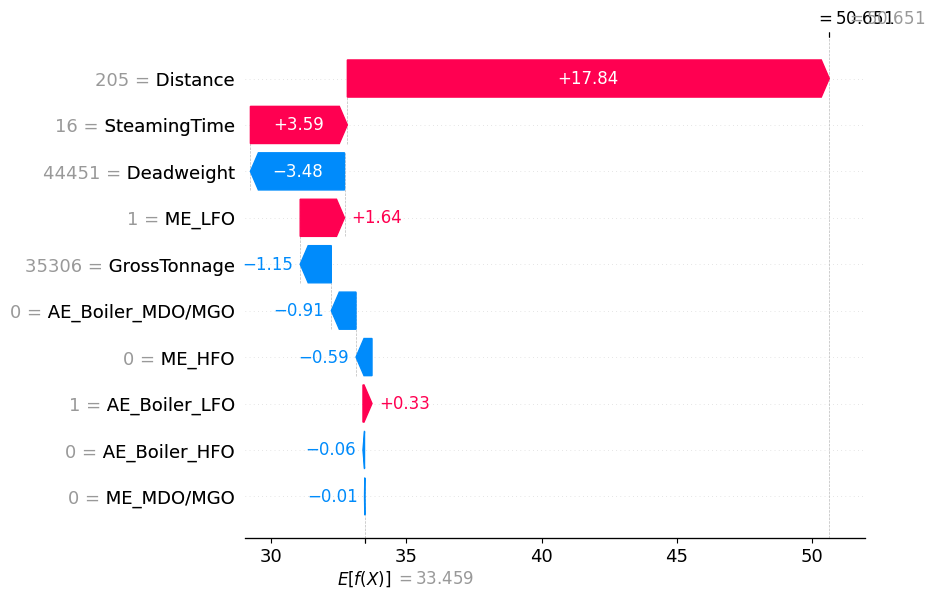

In [14]:
import shap
# on the command prompt install shap using command "pip install shap"

explainer = shap.Explainer(xgb)
shap_values = explainer(single_test_case)
shap.plots.waterfall(shap_values[0])

In [19]:
import joblib

joblib.dump(xgb, 'Models/ship_model_2.joblib')

['Models/ship_model_2.joblib']